In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale


In [2]:
#Import data
income_data = pd.read_csv('income_data1.csv')

In [3]:
income_data.info

<bound method DataFrame.info of        Age Workclass  Final_Weight     Education  Education_Num  \
0       90         ?         77053       HS-grad              9   
1       82   Private        132870       HS-grad              9   
2       66         ?        186061  Some-college             10   
3       54   Private        140359       7th-8th              4   
4       41   Private        264663  Some-college             10   
...    ...       ...           ...           ...            ...   
32556   22   Private        310152  Some-college             10   
32557   27   Private        257302    Assoc-acdm             12   
32558   40   Private        154374       HS-grad              9   
32559   58   Private        151910       HS-grad              9   
32560   22   Private        201490       HS-grad              9   

           Marital_Status         Occupation   Relationship   Race     Sex  \
0                 Widowed                  ?  Not-in-family  White  Female   
1      

In [4]:
#Checking the variables
income_data.dtypes

Age                int64
Workclass         object
Final_Weight       int64
Education         object
Education_Num      int64
Marital_Status    object
Occupation        object
Relationship      object
Race              object
Sex               object
Capital_gain       int64
Capital_loss       int64
Hours_per_week     int64
Native_country    object
Income            object
dtype: object

In [5]:
# descriptive Statistics
income_data.describe()

,Age,Final_Weight,Education_Num,Capital_gain,Capital_loss,Hours_per_week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [6]:
income_data.head(5)

,Age,Workclass,Final_Weight,Education,Education_Num,Marital_Status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K


In [7]:
# Get data types
income_data.dtypes

Age                int64
Workclass         object
Final_Weight       int64
Education         object
Education_Num      int64
Marital_Status    object
Occupation        object
Relationship      object
Race              object
Sex               object
Capital_gain       int64
Capital_loss       int64
Hours_per_week     int64
Native_country    object
Income            object
dtype: object

In [8]:
#Changing 
print(income_data['Income'].value_counts())

<=50K    24720
>50K      7841
Name: Income, dtype: int64


In [9]:
# Recoding the Income column, 1 for income greater than 50k and 0 for income less than or equal to 50k
income_data['Income']=income_data['Income'].map({'<=50K': 0, '>50K': 1, '<=50K.': 0, '>50K.': 1})
income_data.head(4)

,Age,Workclass,Final_Weight,Education,Education_Num,Marital_Status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,0
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,0
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,0
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,0


In [10]:
#checking for the unique values of Income
print(income_data['Income'].value_counts())

0    24720
1     7841
Name: Income, dtype: int64


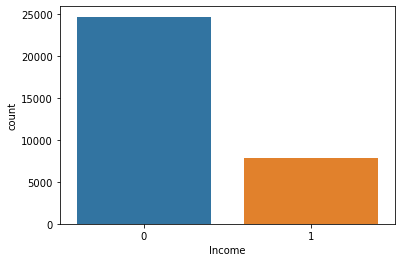

In [11]:
#Bar plot on the income column
sns.countplot(income_data['Income'],label="Frequency")
plt.show()

It can be observed that income less than 50,000 is about three times income more than 50,000

In [12]:
# Identify Numeric Columns
Num_Col = ['Age','Final_Weight','Education_Num','Capital_gain','Capital_loss','Hours_per_week','Income']

# Identify Categorical features
Cat_Col = ['Workclass','Education','Marital_Status', 'Occupation', 'Relationship', 'Race', 'Sex', 'Native']

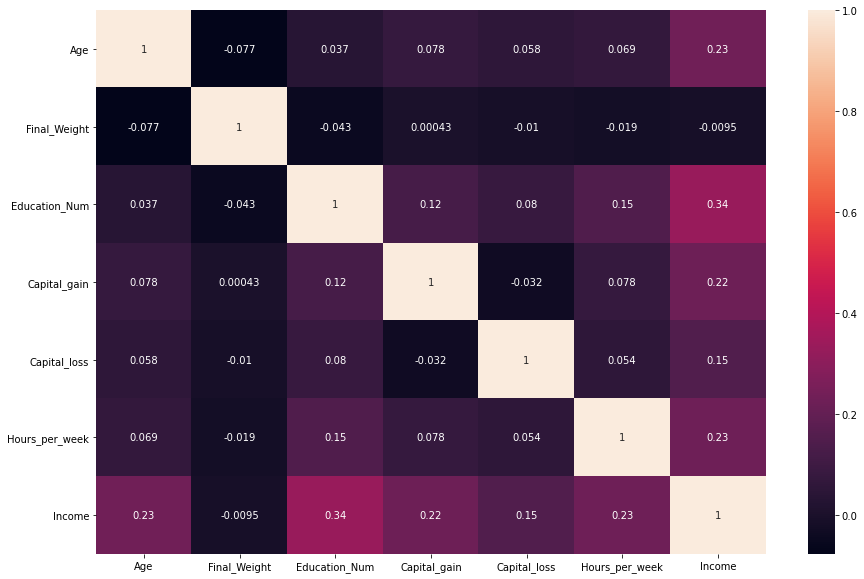

In [13]:
# Correlation matrix between Numerical Values
corr = income_data[Num_Col].corr()
plt.subplots(figsize=(15,10))
sns.heatmap(corr, annot=True)

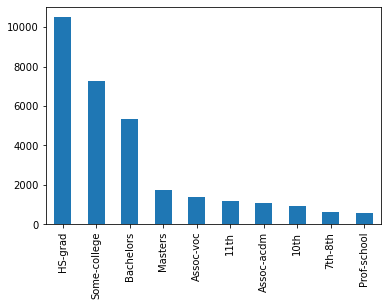

In [14]:
#Bar plot on the Education column
income_data['Education'].value_counts().head(10).plot.bar()

Most people are High school graduant

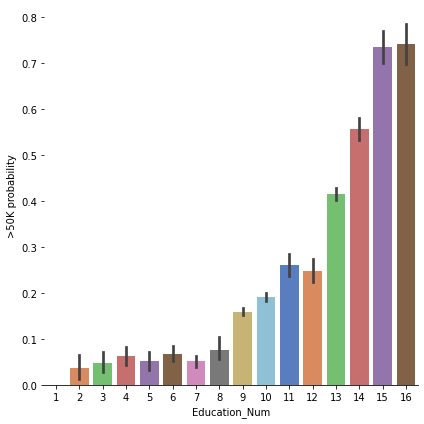

In [15]:
# Explore Education Num vs Income
g = sns.catplot(x="Education_Num",y="Income",data=income_data,kind="bar",height = 6,palette = "muted")
g.despine(left=True)
g = g.set_ylabels(">50K probability")

It can observed that more time you spend in education, the more money you get

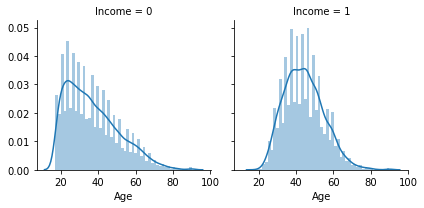

In [16]:
# Explore Age vs Income
g = sns.FacetGrid(income_data, col='Income')
g = g.map(sns.distplot, "Age")
plt.show()

Looking at the Categorical Variable

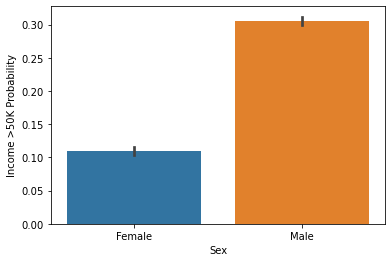

In [17]:
# Explore Sex vs Income
g = sns.barplot(x="Sex",y="Income",data=income_data)
g = g.set_ylabel("Income >50K Probability")
plt.show()


More male make more than 50k than females

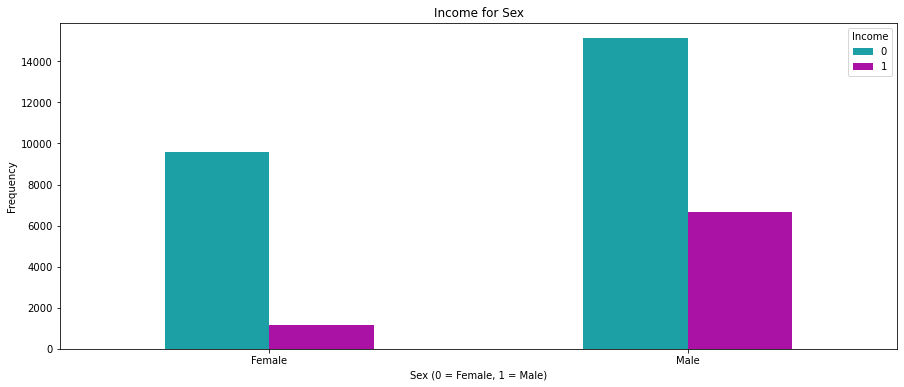

In [18]:
# Explore Sex vs Income
pd.crosstab(income_data['Sex'],income_data['Income']).plot(kind="bar",figsize=(15,6),color=['#1CA0A5','#aa11a5' ])
plt.title('Income for Sex')
plt.xlabel('Sex (0 = Female, 1 = Male)')
plt.xticks(rotation=0)
plt.ylabel('Frequency')
plt.show()


More people earn less than 50k, 

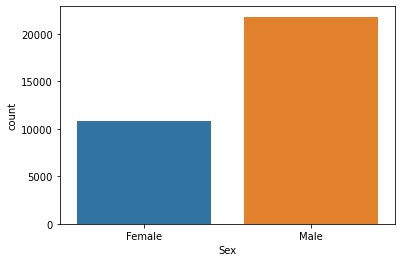

In [19]:
#Bar plot on the Sex column
sns.countplot(income_data['Sex'],label="Frequency")
plt.show()

This data has more male participate than female

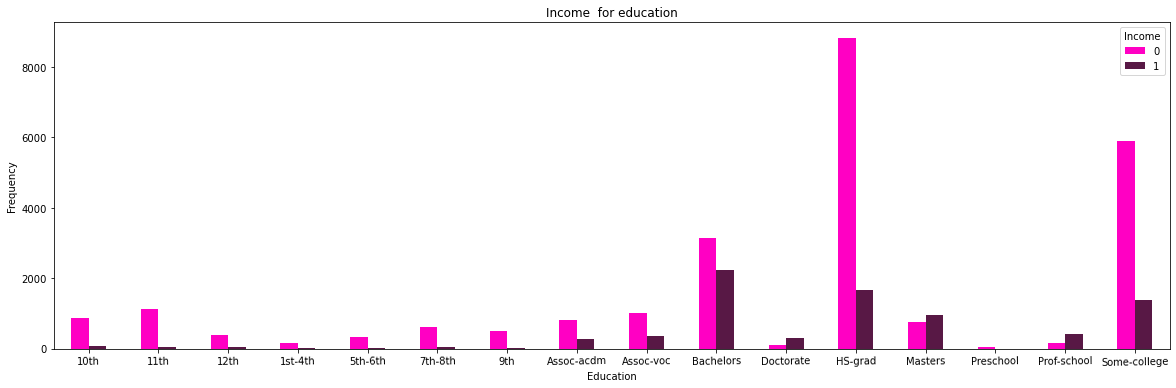

In [20]:
pd.crosstab(income_data['Education'],income_data['Income']).plot(kind="bar",figsize=(20,6),color=['#ff00c3','#581845' ])
plt.title('Income  for education')
plt.xticks(rotation=1)
plt.ylabel('Frequency')
plt.show()

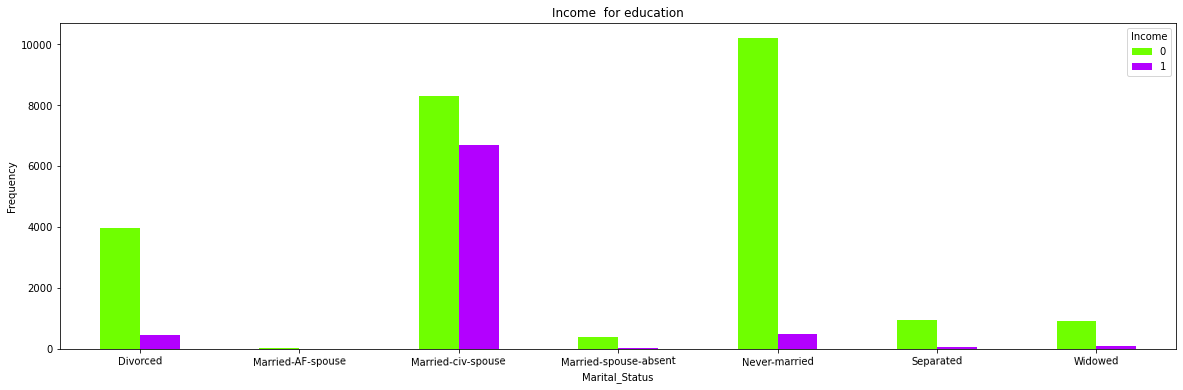

In [21]:
pd.crosstab(income_data['Marital_Status'],income_data['Income']).plot(kind="bar",figsize=(20,6),color=['#6fff00','#b300ff' ])
plt.title('Income  for education')
plt.xticks(rotation=1)
plt.ylabel('Frequency')
plt.show()

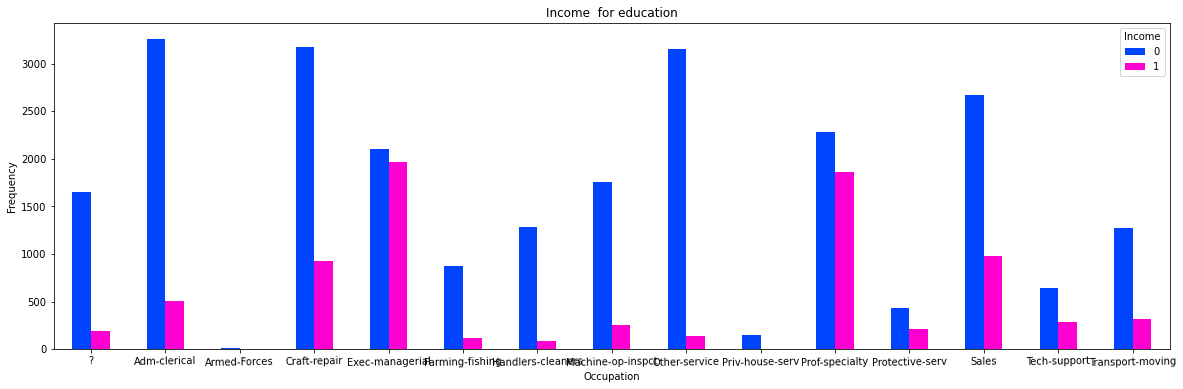

In [22]:
pd.crosstab(income_data['Occupation'],income_data['Income']).plot(kind="bar",figsize=(20,6),color=['#0044ff','#ff00d0' ])
plt.title('Income  for education')
plt.xticks(rotation=1)
plt.ylabel('Frequency')
plt.show()